### James Cooper | CSC 529 | Assignment 2

### Problem 3

In [1]:
cd "C:/Users/James Cooper/Desktop/DePaul/Advanced Data Mining/Homework2"

C:\Users\James Cooper\Desktop\DePaul\Advanced Data Mining\Homework2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


#### a.	Repeat Problem 2.b from Assignment#1 on the Wine Recognition Dataset but this time considering only two classes (let us say, class 1 (positive class) versus class 2 and class 3 (negative class) since the ROC and lift curves can only be drawn for binary classification problems).

In [31]:
dat = pd.read_csv("Wine_data_3.csv", sep=',')
dat.head()

,Classes,Classes_num,Alcohol,Malic_Acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonfavanoid_phenols,Proanthocyanins,Color Intensity,Hue,OD280_diluted_wines,Proline
0,1,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [198]:
data_2 = dat.drop(['Classes', 'Classes_num'], axis=1).values
classes_2 = dat['Classes_num'].astype('int').values

In [40]:
data_2[1]

array([  1.32000000e+01,   1.78000000e+00,   2.14000000e+00,
         1.12000000e+01,   1.00000000e+02,   2.65000000e+00,
         2.76000000e+00,   2.60000000e-01,   1.28000000e+00,
         4.38000000e+00,   1.05000000e+00,   3.40000000e+00,
         1.05000000e+03])

In [36]:
classes_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_2, classes_2, test_size=.34, random_state=21)

In [193]:
bclassifier = naive_bayes.GaussianNB()
bfitted = bclassifier.fit(X_train, y_train)
bayespredict_train = bfitted.predict(X_train)
bayespredict = bfitted.predict(X_test)

In [195]:
cmatrix = confusion_matrix(y_train, bayespredict_train)
cmatrix

array([[37,  2],
       [ 2, 76]])

In [50]:
#Performance Evaluation
confmatrix = confusion_matrix(y_test, bayespredict)
confmatrix

array([[19,  1],
       [ 0, 41]])

In [51]:
TP = confmatrix[1, 1]
TN = confmatrix[0, 0]
FP = confmatrix[0, 1]
FN = confmatrix[1, 0]

#### b.	Draw the ROC curves for the Naïve Bayes performance on both the training and testing data. Interpret the graphs.  If you would have to choose a certain probability threshold to maximize both sensitivity and specificity on the testing data, which threshold value would you select?

In [59]:
y_pred_prob = bclassifier.predict_proba(X_test)[:,1]

In [62]:
X_test[:,1]

array([ 1.73,  0.74,  3.8 ,  4.95,  5.65,  1.35,  1.75,  1.57,  2.99,
        2.36,  2.16,  0.98,  3.12,  1.63,  1.67,  2.76,  3.88,  3.1 ,
        3.03,  4.04,  1.89,  1.29,  3.03,  1.39,  1.88,  1.34,  1.87,
        1.86,  1.1 ,  1.71,  1.25,  0.94,  3.9 ,  1.73,  1.77,  3.27,
        3.17,  1.47,  2.67,  1.65,  2.83,  2.43,  1.6 ,  1.51,  1.52,
        1.77,  2.51,  4.61,  1.61,  1.41,  2.15,  3.59,  2.56,  4.12,
        1.67,  2.55,  2.13,  1.61,  1.87,  4.72,  4.1 ])

In [58]:
y_pred_prob

array([  2.43706935e-07,   1.00000000e+00,   5.28371408e-01,
         1.00000000e+00,   1.00000000e+00,   2.20608666e-07,
         1.07569310e-08,   3.94546705e-07,   1.00000000e+00,
         1.39753663e-07,   9.99999337e-01,   9.99964551e-01,
         1.00000000e+00,   8.98520209e-06,   5.43069535e-07,
         1.00000000e+00,   1.00000000e+00,   7.07882893e-05,
         1.00000000e+00,   9.40810148e-05,   1.31940249e-07,
         1.00000000e+00,   1.00000000e+00,   9.99999978e-01,
         1.00000000e+00,   1.00000000e+00,   5.96964069e-10,
         7.02624985e-06,   1.00000000e+00,   3.95840396e-05,
         9.99992817e-01,   1.00000000e+00,   1.00000000e+00,
         9.99999987e-01,   1.20509970e-07,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         3.48295351e-04,   9.99982565e-01,   9.99999168e-01,
         2.82131302e-03,   1.00000000e+00,   9.99768643e-01,
         2.95706738e-04,   1.00000000e+00,   1.00000000e+00,
         9.99999626e-01,

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
thresholds

array([  1.00000000e+00,   9.99768643e-01,   3.27384401e-14])

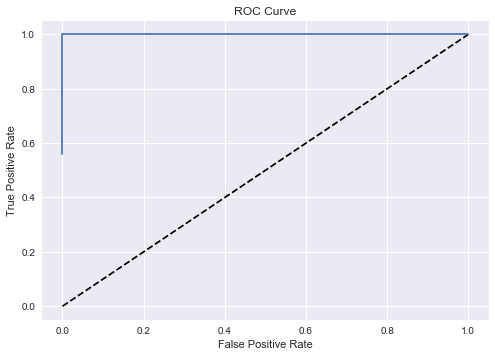

In [56]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [82]:
print(thresholds)

[  1.00000000e+00   9.99768643e-01   3.27384401e-14]


In [87]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print ('Sensitivity:', tpr[thresholds > threshold][-1])
    print ('Specificity:', 1 - fpr[thresholds > threshold][-1])

So the threshold here is 0.99, if we go below 0.9999 the Sensitivity will go to 1

In [207]:
evaluate_threshold(0.9999)

('Sensitivity:', 0.56097560975609762)
('Specificity:', 1.0)


In [101]:
y_pred_prob_train = bclassifier.predict_proba(X_train)[:,1]

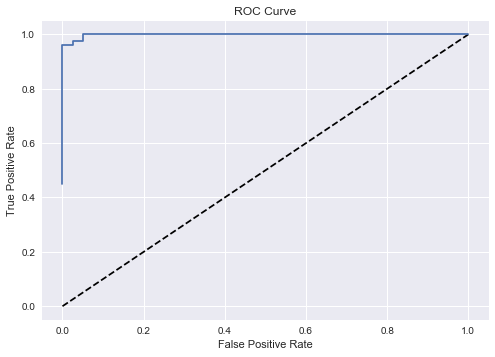

In [97]:
from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)


# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### c.	Draw the lift curves for the Naïve Bayes performance on both the training and testing data. Interpret the results.  If the requirement is to get at least 80% accuracy on the data with a minimum cost of data acquisition, what size for the data would you recommend to reach that accuracy performance?

The Bayes model is used to predict on the training and testing set here. This time we are using predict_proba, which is a very useful tool that gives us 2 arrays of the probabilities of predicting the particular class for each instance. The first column or array, is Class 0, the second column is Class 1. Here Class 1 is used. Dummy variables are obtained for each instance of the data, so 2 columns are obtained and then indexed with the sorted scores from low to high. Now there is an indexed array with the scores matched with the actual classes (sort_class1). Since the classes are sorted, the 1's should mostly be at the beginning, and if 0's are interspersed that will penalize the score or the cumulative sum will be less. This will be illustrated on the gain chart as to how much of the target is identified.

In [174]:
probas = bfitted.predict_proba(X_train)
probas

array([[  9.99999937e-01,   6.30759867e-08],
       [  3.81456953e-17,   1.00000000e+00],
       [  1.11129548e-07,   9.99999889e-01],
       [  7.50840696e-06,   9.99992492e-01],
       [  3.63469884e-33,   1.00000000e+00],
       [  1.00000000e+00,   5.98982209e-14],
       [  1.83176290e-23,   1.00000000e+00],
       [  1.16838569e-16,   1.00000000e+00],
       [  8.40859597e-16,   1.00000000e+00],
       [  3.86512183e-20,   1.00000000e+00],
       [  9.86091925e-01,   1.39080751e-02],
       [  3.21835955e-12,   1.00000000e+00],
       [  4.04346366e-10,   1.00000000e+00],
       [  9.99999781e-01,   2.19459642e-07],
       [  9.98600322e-01,   1.39967830e-03],
       [  1.00000000e+00,   2.09099153e-12],
       [  9.99996650e-01,   3.34994746e-06],
       [  7.67080237e-01,   2.32919763e-01],
       [  9.99598301e-01,   4.01698752e-04],
       [  9.99999799e-01,   2.00978679e-07],
       [  1.13222007e-14,   1.00000000e+00],
       [  4.66577588e-16,   1.00000000e+00],
       [  

In [211]:
scores = probas[:,1]
scores

array([  6.30759867e-08,   1.00000000e+00,   9.99999889e-01,
         9.99992492e-01,   1.00000000e+00,   5.98982209e-14,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.39080751e-02,   1.00000000e+00,
         1.00000000e+00,   2.19459642e-07,   1.39967830e-03,
         2.09099153e-12,   3.34994746e-06,   2.32919763e-01,
         4.01698752e-04,   2.00978679e-07,   1.00000000e+00,
         1.00000000e+00,   4.21927781e-08,   9.99999999e-01,
         1.87849374e-09,   1.00000000e+00,   9.99928640e-01,
         9.94291076e-01,   1.00000000e+00,   9.99999807e-01,
         8.96473261e-01,   1.00000000e+00,   9.97634025e-01,
         1.00000000e+00,   1.00000000e+00,   2.87634839e-13,
         1.00212101e-04,   1.00000000e+00,   4.69546438e-06,
         9.99998738e-01,   1.55733462e-09,   8.47980800e-06,
         9.99999114e-01,   4.56477222e-10,   1.69401266e-09,
         1.00000000e+00,   9.99994612e-01,   7.22586024e-06,
         1.00000000e+00,

In [161]:
y_train

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0])

In [162]:
class_instances = pd.get_dummies(y_train).as_matrix()
class_instances

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1,

In [209]:
class1 = class_instances[:,1]

In [175]:
num_class1 = np.sum(class1)
num_class1


78

In [213]:
index = np.argsort(scores, axis=0)
index

array([ 98,   5,  94,  35,  15,  95,  43,  90,  88,  66,  40,  44,  24,
        76,  22,   0,  67,  19, 116,  13, 114,  68,  55,  16,  97,  38,
        47,  41,  85,  92,  36,  18,  54,  14,  62,  10, 115,  17,  71,
        61,  69,  52,  30, 110,  72,  27,  32,  83,  26, 104,   3,  46,
        77, 112,  63,  39,  42, 109,  56, 103,  29,   2,  82,  93,  23,
        12,  80, 106, 108, 100,  31,  64,  89,  11,  60,  33,  59,  70,
       113,  37,  20,  86, 111,   1,  99, 101, 102, 105, 107,  96,  91,
         8,   6,  21,  25,  28,  34,  45,  48,  49,  50,  51,  53,   4,
        57,   9,  73,  74,  75,   7,  78,  79,  81,  84,  87,  65,  58], dtype=int64)

In [214]:
index_inv = index[::-1]
index_inv

array([ 58,  65,  87,  84,  81,  79,  78,   7,  75,  74,  73,   9,  57,
         4,  53,  51,  50,  49,  48,  45,  34,  28,  25,  21,   6,   8,
        91,  96, 107, 105, 102, 101,  99,   1, 111,  86,  20,  37, 113,
        70,  59,  33,  60,  11,  89,  64,  31, 100, 108, 106,  80,  12,
        23,  93,  82,   2,  29, 103,  56, 109,  42,  39,  63, 112,  77,
        46,   3, 104,  26,  83,  32,  27,  72, 110,  30,  52,  69,  61,
        71,  17, 115,  10,  62,  14,  54,  18,  36,  92,  85,  41,  47,
        38,  97,  16,  55,  68, 114,  13, 116,  19,  67,   0,  22,  76,
        24,  44,  40,  66,  88,  90,  43,  95,  15,  35,  94,   5,  98], dtype=int64)

In [215]:
sort_class1 = class1[index_inv]
sort_class1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [216]:
cclass1 = np.cumsum(sort_class1)
cclass1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 75, 76, 76, 77, 78, 78, 78, 78, 78, 78,
       78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
       78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78], dtype=uint32)

Here we have the cumulative sum of the correctlly classified target values divided by the total number of observations.
This gives us the proportion of how accurate we are on the overall predictions at any point - so for example up to the 13th point we have classified 13/78 correctly or, at the 14th point we have classified correctly 14/78 or 0.1795%, and on up until we do no longer correctly classify, we then either repeat (such as 75 and 76) or reach 78 where we have classified 100% of the correct samples

In [222]:
cumulative_proportion = np.divide(cclass1, num_class1, dtype=float)
cumulative_proportion

array([ 0.01282051,  0.02564103,  0.03846154,  0.05128205,  0.06410256,
        0.07692308,  0.08974359,  0.1025641 ,  0.11538462,  0.12820513,
        0.14102564,  0.15384615,  0.16666667,  0.17948718,  0.19230769,
        0.20512821,  0.21794872,  0.23076923,  0.24358974,  0.25641026,
        0.26923077,  0.28205128,  0.29487179,  0.30769231,  0.32051282,
        0.33333333,  0.34615385,  0.35897436,  0.37179487,  0.38461538,
        0.3974359 ,  0.41025641,  0.42307692,  0.43589744,  0.44871795,
        0.46153846,  0.47435897,  0.48717949,  0.5       ,  0.51282051,
        0.52564103,  0.53846154,  0.55128205,  0.56410256,  0.57692308,
        0.58974359,  0.6025641 ,  0.61538462,  0.62820513,  0.64102564,
        0.65384615,  0.66666667,  0.67948718,  0.69230769,  0.70512821,
        0.71794872,  0.73076923,  0.74358974,  0.75641026,  0.76923077,
        0.78205128,  0.79487179,  0.80769231,  0.82051282,  0.83333333,
        0.84615385,  0.85897436,  0.87179487,  0.88461538,  0.89

In [218]:
n = y_train.shape[0]
n

117L

In [219]:
targsize = np.arange(1, 118, 1)
targsize_percent = np.divide(targsize, n, dtype=float)
targsize_percent

array([ 0.00854701,  0.01709402,  0.02564103,  0.03418803,  0.04273504,
        0.05128205,  0.05982906,  0.06837607,  0.07692308,  0.08547009,
        0.09401709,  0.1025641 ,  0.11111111,  0.11965812,  0.12820513,
        0.13675214,  0.14529915,  0.15384615,  0.16239316,  0.17094017,
        0.17948718,  0.18803419,  0.1965812 ,  0.20512821,  0.21367521,
        0.22222222,  0.23076923,  0.23931624,  0.24786325,  0.25641026,
        0.26495726,  0.27350427,  0.28205128,  0.29059829,  0.2991453 ,
        0.30769231,  0.31623932,  0.32478632,  0.33333333,  0.34188034,
        0.35042735,  0.35897436,  0.36752137,  0.37606838,  0.38461538,
        0.39316239,  0.4017094 ,  0.41025641,  0.41880342,  0.42735043,
        0.43589744,  0.44444444,  0.45299145,  0.46153846,  0.47008547,
        0.47863248,  0.48717949,  0.4957265 ,  0.5042735 ,  0.51282051,
        0.52136752,  0.52991453,  0.53846154,  0.54700855,  0.55555556,
        0.56410256,  0.57264957,  0.58119658,  0.58974359,  0.59

In [228]:
y_test.shape[0]

61L

##### Using the testing data:

In [230]:
probas_test = bfitted.predict_proba(X_test)
scores_test = probas_test[:,1]
class_instances_test = pd.get_dummies(y_test).as_matrix()
class1_test = class_instances_test[:,1]
num_class1_test = np.sum(class1_test)
index_test = np.argsort(scores_test, axis=0)
index_inv_test = index_test[::-1]
sort_class1_test = class1_test[index_inv_test]
cclass1_test = np.cumsum(sort_class1_test)
cumulative_proportion_test = np.divide(cclass1_test, num_class1_test, dtype=float)
n_test = y_test.shape[0]
targsize_test = np.arange(1, 62, 1)
targsize_percent_test = np.divide(targsize_test, n, dtype=float)

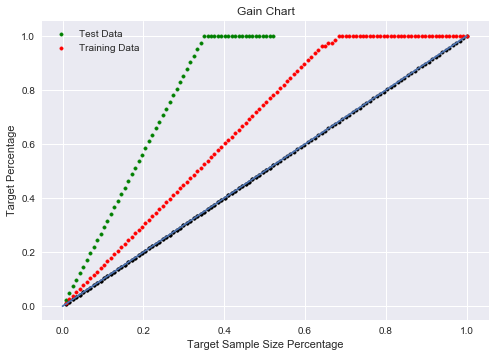

In [238]:
plt.title('Gain Chart')
plt.xlabel('Target Sample Size Percentage')
plt.ylabel('Target Percentage')

plt.plot([0, 1], [0, 1])
plt.scatter(targsize_percent_test, targsize_percent_test, marker = '.', color = 'black')
plt.scatter(targsize_percent_test, cumulative_proportion_test, marker = '.', color = 'green', label='Test Data')
plt.scatter(targsize_percent, targsize_percent, marker = '.', color = 'black')
plt.scatter(targsize_percent, cumulative_proportion, marker = '.', color = 'red', label='Training Data')
plt.legend()
plt.show()

From the gain chart, if we want 80% accuracy, we would only need a sample size percentage of around 30%